In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

# Abstract

# Introduction

From the California Housing Prices data collected from Kaggle that contains information about Housing prices in a block of houses in California District in the year 1990. The data is comprised of ten columns that can provide comprehensive information about the houses.

## Background

In California, there is many residence variability, as such houses located near bay and houses located far away from the ocean. From the discrepancy we would like to know if there is any notable relationship between all the aspects that we may be able to draw some conclusions from it. 

## Goals

There are some goals that the author wants to achieve in this research, one of them is to apply a python data analytics methods to this dataset, collecting informations from the columns, to practice statistic method to the dataset and lastly to draw some useful conclusion from it.

## Questions & Hypotheses

1. Are there any correlations to the house price to the house's proximity to the ocean?
2. What is the correlation of total bedrooms, and total rooms variable the house price?
3. Does the house's population have any correlation to the house price?
4. Are there any relationship between the income of the residents and the house price?

## Limitations & Assumptions

This dataset is taken from Kaggle dataset, contains information from the 1990 California census and only pertains about housing price in that year. Any expectation such as predicting future house price let alone in California may not be feasible.

## Glossary

This dataset is taken solely from the Kaggle's California Housing Price in 1990 [Kamus,price]

# Pre-Analysis

In [4]:
df_house = pd.read_csv('housing.csv')
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
df_house['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
df_house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
median_total_bedrooms = math.floor(df_house['total_bedrooms'].median())
df_house['total_bedrooms'] = df_house['total_bedrooms'].fillna(median_total_bedrooms)
df_house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

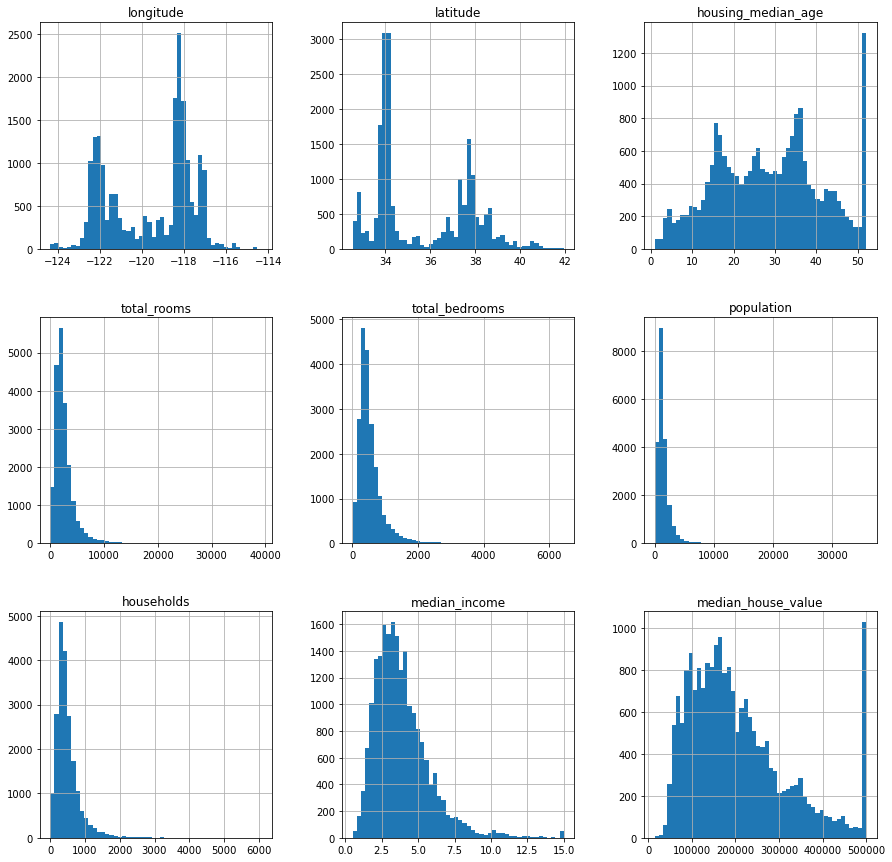

In [21]:
df_house.hist(bins=50, figsize=(15,15))
plt.show()

<AxesSubplot:xlabel='median_house_value'>

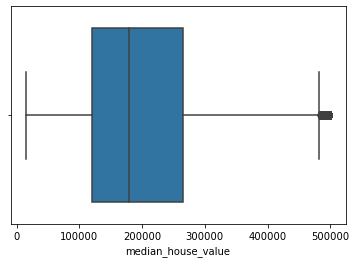

In [23]:
sns.boxplot(x='median_house_value',data=df_house)

From the median house value data boxplot it is seen that there are global outliers listed above the 490000 value. Range of outliers can be drawn off from the data to make a more convincing interpretation

In [86]:
q1_val = np.percentile(df_house['median_house_value'],25)
q3_val = np.percentile(df_house['median_house_value'],75)
iqr_val = q3_val - q1_val
max_val = q3_val + 1.5*iqr_val
min_val = q1_val - 1.5*iqr_val
df_house_no_out = df_house[(df_house['median_house_value']<=max_val)&(df_house['median_house_value']>=min_val)&(df_house['population']<=max_val_pop)&(df_house['population']<=max_val_pop)&(df_house['median_income']<=max_val_inc)&(df_house['median_income']>=min_val_inc)&(df_house['households']<=max_val_h)&(df_house['households']>=min_val_h)]
df_house_no_out['log_house_val'] = np.log(df_house_no_out['median_house_value'])
# df_house_no_out

<ipython-input-86-803251a4be62>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_no_out['log_house_val'] = np.log(df_house_no_out['median_house_value'])


<AxesSubplot:xlabel='population'>

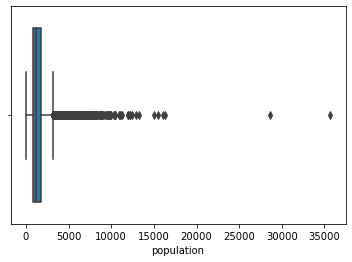

In [58]:
sns.boxplot(x='population', data = df_house)

From the population data boxplot it is seen that there are global outliers listed above the 5000 value. Range of outliers can be drawn off from the data to make a more convincing interpretation

In [59]:
q1_val_pop = np.percentile(df_house['population'],25)
q3_val_pop = np.percentile(df_house['population'],75)
iqr_val_pop = q3_val_pop - q1_val_pop
max_val_pop = q3_val_pop + 1.5*iqr_val_pop
min_val_pop = q1_val_pop - 1.5*iqr_val_pop

<AxesSubplot:xlabel='median_income'>

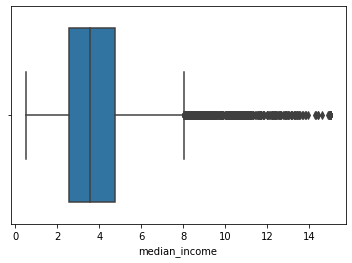

In [66]:
sns.boxplot(x='median_income', data=df_house)

From the median income data boxplot it is seen that there are global outliers listed above the 8 value. Range of outliers can be drawn off from the data to make a more convincing interpretation

In [67]:
q1_val_inc = np.percentile(df_house['median_income'],25)
q3_val_inc = np.percentile(df_house['median_income'],75)
iqr_val_inc = q3_val_inc - q1_val_inc
max_val_inc = q3_val_inc + 1.5*iqr_val_inc
min_val_inc = q1_val_inc - 1.5*iqr_val_inc

<AxesSubplot:xlabel='households'>

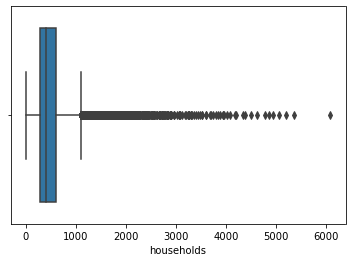

In [79]:
sns.boxplot(x='households', data= df_house)

From the households data boxplot it is seen that there are global outliers listed above the 12000 value. Range of outliers can be drawn off from the data to make a more convincing interpretation

In [80]:
q1_val_h = np.percentile(df_house['households'],25)
q3_val_h = np.percentile(df_house['households'],75)
iqr_val_h = q3_val_h - q1_val_h
max_val_h = q3_val_h + 1.5*iqr_val_h
min_val_h = q1_val_h - 1.5*iqr_val_h

<AxesSubplot:>

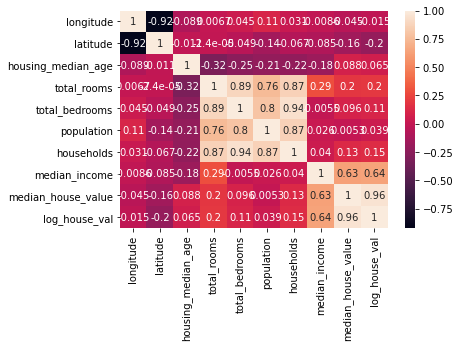

In [85]:
corr_df = df_house_no_out.corr()
sns.heatmap(corr_df,annot=True)

In [99]:
#Normality Test Median House Price
from scipy.stats import shapiro
alpha = 0.05
median_h_p = df_house_no_out['median_house_value']
test_statistic, pvalue = shapiro(median_h_p)
if pvalue <= alpha:
    print('Reject null hypothesis: the data is not drawn from a normally distributed population.')
else:
    print('Failed to reject null hypothesis: the data is drawn from a normally distributed population.')


Reject null hypothesis: the data is not drawn from a normally distributed population.


C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [101]:
#Normality Test For Total Rooms
room = df_house_no_out['total_rooms']
test_statistic, pvalue = shapiro(room)
if pvalue <= alpha:
    print('Reject null hypothesis: the data is not drawn from a normally distributed population.')
else:
    print('Failed to reject null hypothesis: the data is drawn from a normally distributed population.')

Reject null hypothesis: the data is not drawn from a normally distributed population.


C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [102]:
#Normality Test For Total Bedrooms
bedroom = df_house_no_out['total_bedrooms']
test_statistic, pvalue = shapiro(bedroom)
if pvalue <= alpha:
    print('Reject null hypothesis: the data is not drawn from a normally distributed population.')
else:
    print('Failed to reject null hypothesis: the data is drawn from a normally distributed population.')

Reject null hypothesis: the data is not drawn from a normally distributed population.


In [103]:
#Normality Test For Population
pop = df_house_no_out['population']
test_statistic, pvalue = shapiro(median_h_p)
if pvalue <= alpha:
    print('Reject null hypothesis: the data is not drawn from a normally distributed population.')
else:
    print('Failed to reject null hypothesis: the data is drawn from a normally distributed population.')

Reject null hypothesis: the data is not drawn from a normally distributed population.


In [104]:
#Normality Test For Household
hh = df_house_no_out['households']
test_statistic, pvalue = shapiro(hh)
if pvalue <= alpha:
    print('Reject null hypothesis: the data is not drawn from a normally distributed population.')
else:
    print('Failed to reject null hypothesis: the data is drawn from a normally distributed population.')

Reject null hypothesis: the data is not drawn from a normally distributed population.


In [100]:
df_house_no_out

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_house_val
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,12.771671
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,12.740517
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,12.743151
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,12.505066
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,12.608868
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,11.265745
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,11.252859
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,11.432799
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,11.346871


In [ ]:
#Normality Test For Total Median Income
median_i = df_house_no_out['median_income']
test_statistic, pvalue = shapiro(median_i)
if pvalue <= alpha:
    print('Reject null hypothesis: the data is not drawn from a normally distributed population.')
else:
    print('Failed to reject null hypothesis: the data is drawn from a normally distributed population.')

## Data Collection

In [ ]:
#hubungan median_house_value with ocean_proximity
#hubungan luas rumah (total rooms,total bedrooms, with price)
#hubungan population with house value

## Data Preprocessing

In [89]:
price_ocn_prox = df_house_no_out.groupby('ocean_proximity')['median_house_value'].median().sort_values(ascending = False).reset_index()
price_room = df_house_no_out.groupby('total_rooms')['median_house_value'].median().sort_values(ascending = False).reset_index()
price_bedroom = df_house_no_out.groupby('total_bedrooms')['median_house_value'].median().sort_values(ascending = False).reset_index()
price_room['log_value'] = np.log(price_room['median_house_value'])
price_bedroom['log_value'] = np.log(price_bedroom['median_house_value'])
price_room['total_rooms'].corr(price_room['log_value'])
# price_bedroom['total_bedrooms'].corr(price_bedroom['median_house_value'])

0.32621577622556114

# Analysis

Text(0.5, 1.0, 'Correlation Between Median House Price with Ocean Proximity')

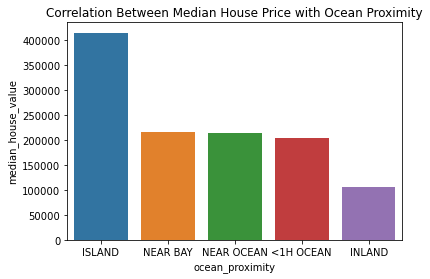

In [92]:
sns.barplot(x='ocean_proximity',y='median_house_value',data=price_ocn_prox)
plt.title('Correlation Between Median House Price with Ocean Proximity')

It is presumed from the barplot that the nearer the house to the ocean or bay, the more expensive is the value the buyer has to pay. Whereas, the further the house to the ocean or inland, the value of the house is less expensive.

Text(0, 0.5, 'log median house price')

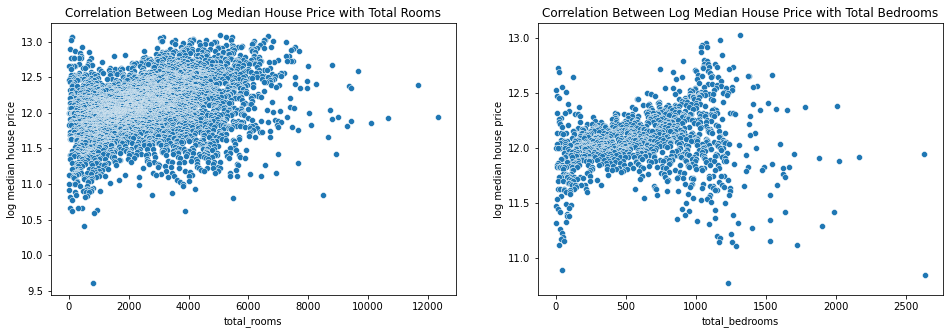

In [94]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.scatterplot(x='total_rooms', y='log_value', data=price_room, ax=ax[0])
sns.scatterplot(x='total_bedrooms', y='log_value', data=price_bedroom, ax=ax[1])
ax[0].title.set_text('Correlation Between Log Median House Price with Total Rooms')
ax[1].title.set_text('Correlation Between Log Median House Price with Total Bedrooms')
ax[0].set_ylabel('log median house price')
ax[1].set_ylabel('log median house price')

In [105]:
corr_room = price_room['total_rooms'].corr(price_room['log_value'], method='spearman')
corr_bedroom = price_bedroom['total_bedrooms'].corr(price_bedroom['log_value'], method='spearman')
print('The Pearson Correlation value between total rooms, and total bedrooms with the logarithmic value of median value of houses are sequentially {}, and {}'.format(corr_room,corr_bedroom))

The Pearson Correlation value between total rooms, and total bedrooms with the logarithmic value of median value of houses are sequentially 0.34075571111195463, and 0.24238800145595543


Between the plotting of total rooms and total bedrooms variables with median value of houses, the correlation between each variables cannot really be seen in the graphs even after attempting logarithm method to the median value of the houses. 
Furthermore, assumming that the total rooms, total bedrooms, and median value of houses data was drawn from a normal distribution, we calculate the Pearson Correlation values, which thus from both of the correlation values can be inferred that there is a weak positive correlation between the variables.

Text(0.5, 1.0, 'Scatterplot of Population and Median House Price')

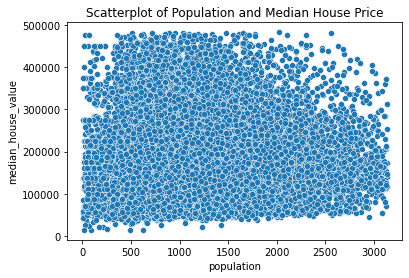

In [95]:
sns.scatterplot(x='population', y='median_house_value', data=df_house_no_out)
plt.title('Scatterplot of Population and Median House Price')

In [106]:
df_house_no_out['population'].corr(df_house_no_out['median_house_value'],method='spearman')

0.029319751686191813

There is a weak positive correlation between the population variable and median house value, 

Text(0.5, 1.0, 'Scatterplot of Log House Value and Median Income')

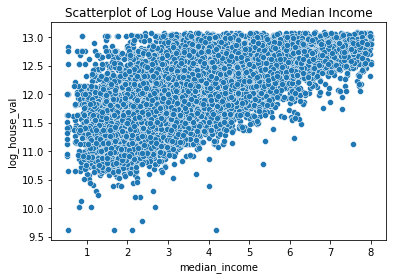

In [96]:
sns.scatterplot(x='median_income',y='log_house_val',data=df_house_no_out)
plt.title('Scatterplot of Log House Value and Median Income')

In [107]:
df_house_no_out[['median_house_value','median_income']].corr(method='spearman')

,median_house_value,median_income
median_house_value,1.000000,0.647462
median_income,0.647462,1.000000


If we look at the scatterplot between the median income versus logarithmic value of median house value , we can see a positive correlation between the two. Thus, after a Pearson's Correlation calculation it a value is gathered that there is a rather strong positive correlation between the mean house value and median income variable.

Text(0.5, 1.0, 'Scatterplot of Median House Value with Total Households')

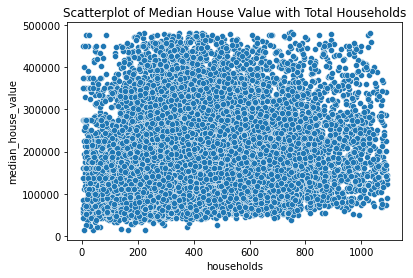

In [97]:
sns.scatterplot(x='households',y= 'median_house_value',data = df_house_no_out)
plt.title('Scatterplot of Median House Value with Total Households')

In [108]:
df_house_no_out[['households','median_house_value']].corr(method='spearman')

,households,median_house_value
households,1.000000,0.139687
median_house_value,0.139687,1.000000


If we look at the scatterplot between the number of households versus median house value , we cannot see any correlation between those variables. Furthermore, after a Pearson's Correlation calculation it a value is gathered that there is a very weak strong positive correlation between the number of households and median income variable.

# Result

## Conclusion

From all variable plotting, it is seen that the only variables that has a really strong correlation is between the median house value with median income. 

## Further Works

For a more comprehensive coverage of the research, we can gather some more 1990 census data with relatable variable such as number of cars of the house's blocks may infer a different relationship with the value of the houses.

# References

Datas were taken solely from the Kaggle dataset: https://www.kaggle.com/camnugent/california-housing-prices